# Comparitive Analysis of Iphone XR RED 128 GB Phone Amazon and Flipkart Reviews

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Amazon Review Analysis

In [ ]:
path="/content/drive/MyDrive/TXTAAssignment/Datasets/AmazonIphoneXRReviews.xlsx"

In [ ]:
amazon_reviews=pd.read_excel(path,na_values="")

In [ ]:
amazon_reviews.head()

rating                                             review
0       4  All is good but not compared to Samsung Galaxy...
1       5  Awesome battery, awesome camera , and awesome ...
2       5  Very good range I phone and I phone user satis...
3       5                                    Cool to feel it
4       5                          Good price great features

In [ ]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  927 non-null    int64 
 1   review  855 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.6+ KB


# Data Clustering

In [ ]:
#This is a sparse matrix
#This is rating prediction for those that are missing
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
amazon_1 = amazon_reviews[~amazon_reviews['review'].isnull()]
amazon_1.shape

(855, 2)

In [ ]:
amazon_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  855 non-null    int64 
 1   review  855 non-null    object
dtypes: int64(1), object(1)
memory usage: 20.0+ KB


In [ ]:
# No data missing in this

In [ ]:
amazon_1.rating.value_counts()

5    577
4    141
1     84
3     36
2     17
Name: rating, dtype: int64

In [ ]:
amazon_1["rating"]=amazon_1["rating"].astype(float)
amazon_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  855 non-null    float64
 1   review  855 non-null    object 
dtypes: float64(1), object(1)
memory usage: 20.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data=amazon_1[~amazon_1['rating'].isnull()]
test_data=amazon_1[amazon_1['rating'].isnull()]

In [ ]:
(train_data.shape,test_data.shape)

((855, 2), (0, 2))

In [ ]:
# Thus we conclude All the the reviews have rating associated with them though some ratings dont have reviews associated with them.

In [ ]:
from wordcloud import STOPWORDS

In [ ]:
stop=list(STOPWORDS)+ ["Flipkart","Amazon","Apple","iPhone","phone","it","xr","iphone"]

In [ ]:
tfidf= TfidfVectorizer(stop_words=stop,token_pattern="[a-z']+",max_df=0.55,min_df=10)

In [ ]:
tfidf_mat_train=tfidf.fit_transform(train_data['review'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'flipkart'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
tfidf_mat_train.shape

(855, 195)

In [ ]:
# 195 unique words

In [ ]:
train_data

rating                                             review
0       4.0  All is good but not compared to Samsung Galaxy...
1       5.0  Awesome battery, awesome camera , and awesome ...
2       5.0  Very good range I phone and I phone user satis...
3       5.0                                    Cool to feel it
4       5.0                          Good price great features
..      ...                                                ...
922     5.0  Good battery life I am an hard user and need t...
923     5.0  Its an iphone. Bas aur kuch bolne ka jarurat n...
924     5.0                                   Value for. Money
925     5.0                                    Value for money
926     5.0         Mobile is awesome & battery life is superb

[855 rows x 2 columns]

In [ ]:
train_data.rating.mean()

4.298245614035087

(array([ 84.,   0.,  17.,   0.,   0.,  36.,   0., 141.,   0., 577.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

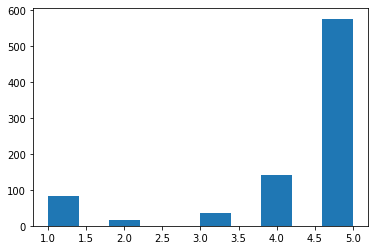

In [ ]:
plt.hist(train_data.rating)

In [ ]:
tfidf.vocabulary_

{'good': 67,
 'compared': 30,
 'display': 39,
 'camera': 24,
 'great': 69,
 'awesome': 8,
 'battery': 12,
 's': 147,
 'worth': 192,
 'price': 130,
 'go': 66,
 'buy': 21,
 'range': 137,
 'user': 179,
 'feel': 55,
 'features': 54,
 'android': 5,
 'years': 194,
 'first': 58,
 'ios': 76,
 'device': 37,
 'really': 138,
 'want': 184,
 'always': 2,
 'don': 41,
 't': 166,
 'quality': 136,
 'best': 13,
 'used': 178,
 'face': 52,
 'fast': 53,
 'even': 45,
 'low': 93,
 'use': 177,
 'fine': 57,
 'heavy': 73,
 'one': 114,
 'month': 101,
 'many': 96,
 'negative': 105,
 'reviews': 145,
 'sound': 160,
 'made': 95,
 'ordered': 118,
 'received': 139,
 'packaging': 122,
 'better': 14,
 'box': 17,
 'see': 153,
 'till': 172,
 'apple': 6,
 'screen': 151,
 'new': 108,
 'latest': 82,
 'using': 180,
 'condition': 31,
 'id': 75,
 'works': 191,
 'well': 187,
 'say': 150,
 'getting': 64,
 'almost': 1,
 'deal': 34,
 'got': 68,
 'will': 188,
 'last': 81,
 'seller': 154,
 'much': 103,
 'giving': 65,
 'delivery': 36,

In [ ]:
svd_new=TruncatedSVD(n_components=150)

In [ ]:
word_vec=svd_new.fit_transform(tfidf_mat_train.T)

In [ ]:
word_vec.shape

(195, 150)

In [ ]:
word_vec

array([[ 0.08395724,  0.08734401, -0.13499732, ...,  0.15012357,
        -0.07403679, -0.1304241 ],
       [ 0.0607518 ,  0.07415637, -0.07378308, ..., -0.07132829,
        -0.01137423,  0.08902796],
       [ 0.07950614,  0.13459796, -0.1654016 , ..., -0.02470387,
         0.03197241, -0.00886032],
       ...,
       [ 0.10454176,  0.15425085, -0.23880469, ..., -0.02978117,
        -0.00831131, -0.02301296],
       [ 0.06544335,  0.1118528 , -0.10166902, ...,  0.0192542 ,
        -0.19895607, -0.07124264],
       [ 0.10222943,  0.11888815, -0.2093362 , ..., -0.03976623,
         0.06544045,  0.03299907]])

In [ ]:
tfidf.vocabulary_['good']

67

In [ ]:
# Lets find out words which are similar to good

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
dist_good=pairwise_distances(X=word_vec,Y=word_vec[67,:].reshape(1,-1),metric='cosine')

In [ ]:
dist_good.flatten().argsort()

array([ 67, 132,  24,  12,  84, 136, 160,  51,  47, 125, 114, 138, 130,
        10, 100,  88, 116,   6,  30, 181, 147,  39, 120,  98, 177, 133,
       123,  59,  61, 137,  52,   5,  21,   9,  65,  26,  99, 151, 161,
        69, 179,  77, 122,  20, 113,  31, 178, 173,  14,  17,   4,  32,
       157,  79,  63, 148, 182,  25, 104,  76, 149, 189,  11, 153, 124,
        81,   3, 190,  80,  19,  68,  96,  49, 103,   1, 191, 118,  44,
       135,  74,  56,  89, 156, 180, 167, 108, 194,  70,  13, 107, 170,
        66,  42,  16, 109, 141, 101,  34, 165, 111, 174, 188, 187,  62,
        58, 112,   0, 171, 175,  53, 152,  73, 121,  54, 193,  36, 163,
       134,  35, 139,  37,  75,  29,  27, 117, 119, 126,  91,  60, 105,
       184, 115,  78,  55,  33, 169,  48,  28, 145,  87,  22,  72, 183,
       144,  97, 102,  86,  46,  90, 158, 185,  92,  40,  85, 192,  50,
        15,  95,  71, 162,  45, 128,  23,  93, 154, 140,   2, 155,  94,
       166,  57,   7, 172,  41,  82, 164, 176,  18,   8, 142,  4

In [ ]:
id_to_word={v:k for k,v in tfidf.vocabulary_.items()}

In [ ]:
id_to_word[132]

'made'

In [ ]:
id_to_word[24]

'bought'

In [ ]:
# The most similar words associated with good are made bought 

# Word Cloud

In [ ]:
train_data.rating.value_counts().index

Float64Index([5.0, 4.0, 1.0, 3.0, 2.0], dtype='float64')

In [ ]:
def convert_to_number(x):
  try:
    return float(x)
  except:
    return np.nan


In [ ]:
train_data['rating']=train_data.rating.map(convert_to_number)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  855 non-null    float64
 1   review  855 non-null    object 
dtypes: float64(1), object(1)
memory usage: 20.0+ KB


In [ ]:
train_data.shape

(855, 2)

In [ ]:
train_data.rating.isnull().sum()

0

In [ ]:
only_reviews=" ".join(train_data.review)

In [ ]:
wc=WordCloud(width=1200,height=800,max_words=200,stopwords=stop,background_color='white')

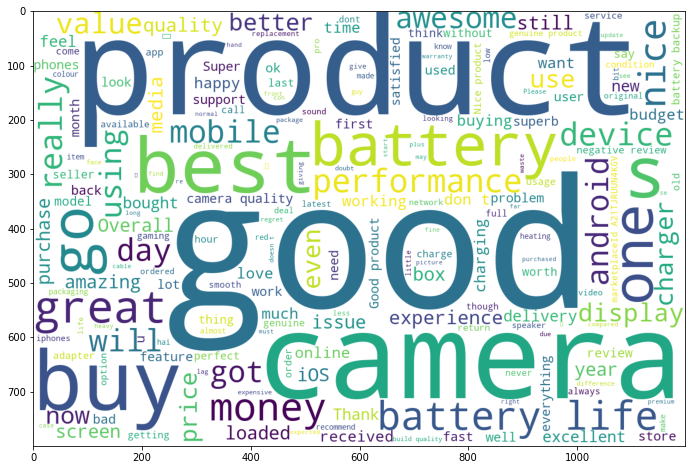

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

# Count Vectorizer

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 

In [ ]:
def wordcounts(dataframe,i):
  tf=CountVectorizer(token_pattern="[a-z']+",max_df=0.55,min_df=10,stop_words=stop,ngram_range=(i,i))
  tf_mat=tf.fit_transform(dataframe.review)
  word_freq=tf_mat.sum(axis=0)
  wf=np.array(word_freq)[0]
  vocab=dict()
  vocab_reversed={v:k for k,v in tf.vocabulary_.items()}
  for i in vocab_reversed.keys():
    vocab[vocab_reversed[i]]=wf[i]
  word_dict=dict(sorted(vocab.items(),key=lambda x:x[1],reverse=True))
  print(word_dict)

In [ ]:
wordcounts(amazon_1,1)

{'good': 317, 'product': 200, 'battery': 177, 'camera': 155, 'amazon': 148, 'apple': 132, 'buy': 118, 's': 102, 'best': 100, 'quality': 91, 'go': 82, 'life': 81, 'nice': 81, 'great': 74, 'one': 70, 'money': 68, 't': 62, 'will': 61, 'android': 58, 'price': 56, 'performance': 56, 'really': 55, 'mobile': 53, 'got': 52, 'media': 52, 'display': 51, 'awesome': 51, 'device': 51, 'using': 51, 'value': 49, 'reviews': 46, 'even': 45, 'new': 44, 'now': 44, 'time': 44, 'use': 43, 'better': 43, 'experience': 43, 'still': 42, 'm': 42, 'charger': 42, 'loaded': 42, 'amazing': 41, 'day': 41, 'ios': 40, 'screen': 39, 'overall': 38, 'u': 38, 'box': 37, 'working': 37, 'purchase': 36, 'delivery': 35, 'excellent': 35, 'bought': 34, 'charging': 34, 'first': 32, 'don': 32, 'genuine': 32, 'user': 31, 'received': 31, 'buying': 31, 'much': 30, 'budget': 30, 'review': 30, 'love': 30, 'back': 29, 'happy': 29, 'super': 29, 'online': 29, 'fast': 28, 'satisfied': 28, 'everything': 28, 'years': 27, 'negative': 27, 'we

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'flipkart'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
wordcounts(amazon_1,2)

{'battery life': 69, 'value money': 45, 'media loaded': 39, 'don t': 32, 'camera quality': 29, 'good product': 26, 'battery backup': 19, 'nice product': 17, 'good battery': 16, 'negative reviews': 15, 'genuine product': 13, 'good camera': 12, 'quality good': 11, 'build quality': 11, 'doesn t': 11, 'camera good': 11, 'thanks amazon': 10, 'original product': 10}


# Syntactic Analysis

In [ ]:
only_reviews

'All is good but not compared to Samsung Galaxy \'S\' series like display, speaker, camera.The speaker base is good but there is no loudness.Not as great as Samsung\'s stereo Awesome battery, awesome camera , and awesome processor that’s what makes this iphone xr worth the price and yeah awesome display go ahead and buy it …. Very good range I phone and I phone user satisfaction at 80 % Cool to feel it Good price great features As an android user for past few years, this was my first ios device.  So far so good. The Ui is really snappy and those who want things to be done quickly and smoothly they should always go for ios(provided they don’t like customisation of their device)Camera quality is by far the best than any android device I have used so far. The face recognition is lighting fast even at low light conditions as they use a special infrared sensor. The only down side is battery which fine for me but might not be the best for a heavy user.I won’t bring out the comparison between

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

2022-09-30 10:50:41.206850: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.6 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp=spacy.load('en_core_web_lg')

In [ ]:
texts=nlp(only_reviews)

In [ ]:
for token in texts[:20]:
    print(token.text)

All
is
good
but
not
compared
to
Samsung
Galaxy
'S
'
series
like
display
,
speaker
,
camera
.
The


In [ ]:
for token in texts[:20]:
    print(token.text,token.pos_)

All PRON
is AUX
good ADJ
but CCONJ
not PART
compared VERB
to ADP
Samsung PROPN
Galaxy PROPN
'S PROPN
' PUNCT
series NOUN
like ADP
display NOUN
, PUNCT
speaker NOUN
, PUNCT
camera NOUN
. PUNCT
The DET


In [ ]:
list(texts.noun_chunks)

[All,
 Samsung Galaxy 'S' series,
 display, speaker, camera,
 The speaker base,
 no loudness,
 Samsung's stereo Awesome battery,
 awesome camera,
 awesome processor,
 that,
 what,
 this iphone,
 xr,
 the price,
 awesome display,
 it,
 Very good range,
 I,
 I,
 user satisfaction,
 80 %,
 Cool,
 it,
 an android user,
 past few years,
 this,
 my first ios device,
 The Ui,
 who,
 things,
 they,
 they,
 customisation,
 their device)Camera quality,
 any android device,
 I,
 The face recognition,
 low light conditions,
 they,
 a special infrared sensor,
 The only down side,
 battery,
 which,
 me,
 a heavy user,
 I,
 the comparison,
 ios devices,
 android devices,
 It,
 you,
 you,
 Both,
 their own advantages,
 you,
 me,
 you,
 this phone,
 That,
 a 100%,
 Iphone xr,
 me,
 i,
 i,
 the phone,
 iphone,
 I,
 this phone,
 the many negative reviews,
 the ones,
 that,
 me,
 hope,
 I,
 a legit phone,
 I,
 I,
 I,
 this phone,
 the 17th,
 I,
 it,
 The packaging,
 it,
 just a cardboard box,
 a plastic b

In [ ]:
for chunk in texts.noun_chunks:
  if len(chunk)>5:
    print(chunk)

the best iphone…app store
very less Waste phone iPhone XR
the Negative ReviewsIt’s best Budget Smart PhoneBattery
वो मुझे  उन आधारों पर
चेक करने मे दिक्कत आई कि मेरा
a very good option.the camera quality
a good quality camera and battery life
the iPhone XS Max's 2,688-by-1,242 pixel display
4gphone and lastly the battery backup
🏻👌🏻 Best apple phone
pro max's big bulky frame
awesome battery life camera quality sound quality Very good Excellent product
Pros...01.camera quality fantastic02.build quality superb03.battery life decent04.sound quality
the camera quality and video quality
शुरुआत में यह फोन ले सकता है
online लेने से बहुत ज्यादा फायदा है , store par
इसकी कीमत काफी ज्यादा है, online के मुकाबले। 35000 में best iPhone
a refurbished / a second hand phone
almost 12 to 15 hours-day time camera qulity
x-mpegURL","isMobile":false,"videoHeight":0}


 A very qualified and genuine product
Working fine till now and overall, a reasonably priced decent smartphone
Overall good,Camera quality a

In [ ]:
list(texts.sents)

[All is good but not compared to Samsung Galaxy 'S' series like display, speaker, camera.,
 The speaker base is good but there is no loudness.,
 Not as great as Samsung's stereo Awesome battery, awesome camera , and awesome processor that’s what makes this iphone xr worth the price,
 and,
 yeah awesome display go ahead and buy it ….,
 Very good range I phone,
 and I phone user satisfaction at 80 % Cool to feel it Good price great features As an android user for past few years, this was my first ios device.  ,
 So far so good.,
 The Ui is really snappy and those who want things to be done quickly and smoothly they should always go for ios(provided they don’t like customisation of their device)Camera quality is by far the best than any android device I have used so far.,
 The face recognition is lighting fast even at low light conditions as they use a special infrared sensor.,
 The only down side is battery which fine for me but might not be the best for a heavy user.,
 I won’t bring out

In [ ]:
for ent in texts.ents:
  print(ent.text,ent.label_)

Samsung Galaxy 'S' ORG
Samsung ORG
80 % PERCENT
past few years DATE
first ORDINAL
Ui PERSON
device)Camera ORG
100% PERCENT
13 CARDINAL
today DATE
about 5 mins TIME
almost 50% PERCENT
52K QUANTITY
34K. PERSON
Apple ORG
another 3 years DATE
OTP ORG
iPhone ORG
Number Apple PRODUCT
Apple ORG
a week ago DATE
January 2022 DATE
2018.It LOC
12mp DATE
2024 DATE
6 CARDINAL
this year DATE
6 months DATE
only 200 CARDINAL
20 days DATE
64 GB QUANTITY
200 CARDINAL
2 months DATE
1st ORDINAL
2012 DATE
third ORDINAL
2022 DATE
35k CARDINAL
5 CARDINAL
BMW ORG
XR ORG
12 CARDINAL
XR PRODUCT
35,000 CARDINAL
One CARDINAL
first ORDINAL
Apple ORG
videoWidth":0,"videoUrl":"https://m.media-amazon.com ORG
Automated)"},"captionsOffText":"Captions CARDINAL
I/41lAPpWxnHL._SY256._SY256.jpg","closedCaptionsConfig":{"captionsOnTexts":{"en":"English NORP
Automated)"},"captionsOffText":"Captions CARDINAL
XR PRODUCT
second ORDINAL
XR PRODUCT
Battery LOC
Negative PRODUCT
2 days DATE
useBattery Charger ORG
Apple 13 ORG
1 CAR

In [ ]:
for token in texts:
  if token.ent_type_ =='PERSON':
    txt=" ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text,token.dep_," ".join([i.text for i in token.subtree]))

Ui nsubj The Ui
था acl हो रहा था साथ मे पॉवर
XS compound iPhone XS
Max poss the iPhone XS Max 's
deffect pobj no deffect
maari dobj Vera maari
max poss pro max 's
Vera compound quality Vera
amazonAlways dep gud thanks amazonAlways
fon ROOT The media could not be loaded . 
                



  Iphon supar fon any Android find .....
Dad nsubj My Dad
है ROOT चाहता है , शुरुआत में यह फोन ले सकता है ,
है appos शुरुआत में यह फोन ले सकता है ,
nightmode ROOT Miss nightmode .
bhot ROOT bhot dr ra thah online mgau ki nai negative review dek kr ab toh lgra woh sare negative review fake hh phn excellent hh jise mgana hh mga
ra dobj dr ra
skta ROOT skta hh bina dre.thank uh was afraid to purchase due to fraud cases but then ordered and I am completely satisfied with t he product just go for it without any worries Best in iPhone categories ...
acha compound Bhot acha
Amaizing ROOT Amaizing phone by Apple Iphone XR .
aachhha compound kiya tha aachhha
aaya pobj proper packaging Dar dar k order kiya t

In [ ]:
sent1=list(texts.sents)[1]
sent1

The speaker base is good but there is no loudness.

In [ ]:
sent2=list(texts.sents)[2]
sent2

Not as great as Samsung's stereo Awesome battery, awesome camera , and awesome processor that’s what makes this iphone xr worth the price

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(sent1,jupyter=True)

In [ ]:
only_reviews

'All is good but not compared to Samsung Galaxy \'S\' series like display, speaker, camera.The speaker base is good but there is no loudness.Not as great as Samsung\'s stereo Awesome battery, awesome camera , and awesome processor that’s what makes this iphone xr worth the price and yeah awesome display go ahead and buy it …. Very good range I phone and I phone user satisfaction at 80 % Cool to feel it Good price great features As an android user for past few years, this was my first ios device.  So far so good. The Ui is really snappy and those who want things to be done quickly and smoothly they should always go for ios(provided they don’t like customisation of their device)Camera quality is by far the best than any android device I have used so far. The face recognition is lighting fast even at low light conditions as they use a special infrared sensor. The only down side is battery which fine for me but might not be the best for a heavy user.I won’t bring out the comparison between

In [ ]:
doc1=nlp(only_reviews)

In [ ]:
displacy.render(doc1,style="ent",jupyter=True)

In [ ]:
for token in doc1:
  print(token)
  print(token.pos_)

Streaming output truncated to the last 5000 lines.
AUX
comparatively
ADV
low
ADJ
.
PUNCT
This
DET
phone
NOUN
is
AUX
looking
VERB
great
ADJ
and
CCONJ
battery
NOUN
backup
NOUN
is
AUX
excellent
ADJ
.
PUNCT
Amazon
PROPN
packaging
NOUN
and
CCONJ
delivery
NOUN
is
AUX
good
ADJ
.
PUNCT
I
PRON
would
AUX
recommend
VERB
you
PRON
to
PART
buy
VERB
this
DET
phone
NOUN
in
ADP
2021
NUM
It
PRON
’s
VERB
a
DET
decent
ADJ
iphone
NOUN
to
PART
buy
VERB
in
ADP
2021
NUM
it
PRON
work
VERB
’s
VERB
no
PRON
less
ADJ
than
ADP
latest
ADJ
iphone
NOUN
with
ADP
it
PRON
’s
VERB
a12
NOUN
chip
NOUN
it
PRON
blaze
VERB
through
ADP
apps
NOUN
with
ADP
no
DET
problems
NOUN
.
PUNCT
Best
ADJ
budget
NOUN
iphone
NOUN
you
PRON
can
AUX
buy
VERB
right
ADV
now
ADV
!
PUNCT
No
INTJ
complain
VERB
what
PRON
's
AUX
so
ADV
ever
ADV
.
PUNCT
Amazing
ADJ
phone
NOUN
.
PUNCT
Fluid
ADJ
,
PUNCT
aesthetically
ADV
pleasing
ADJ
,
PUNCT
great
ADJ
camera
NOUN
performance
NOUN
and
CCONJ
successful
ADJ
in
ADP
establishing
VERB
a
DET
true
ADJ
definition


In [ ]:
for token in doc1:
  if token.pos_ =='NOUN':
    print(token)

series
display
speaker
camera
speaker
base
loudness
battery
camera
processor
iphone
price
display
range
user
satisfaction
%
price
features
android
user
years
device
things
customisation
device)Camera
quality
android
device
face
recognition
conditions
sensor
side
battery
user
comparison
devices
devices
one
advantages
phone
%
Iphone
month
phone
iphone
phone
cause
reviews
ones
hope
phone
phone
17th
today
20th
packaging
cardboard
box
bag
phone
box
box
phone
battery
mins
apple
logo
start
screen
phone
os
authenticity
code
phone
mint
condition
dents
phone
box
scratches
ID
Tone
phone
%
deal
box
K
34K.
updates
years
seller
phone
comment
concerns
phone
risk
delivery
guy
package
phone
money
reader
phones
phone
issues
product
camera
screen
interface
Battery
life
problem
buy
family
phone
week
phone
media
video
editing
photography
photo
editing
mail
gaming
media
consumption
cases
phone
premium
phones
range
camera
lens
screen
topic
screen
hd
user
screen
screen
premium
screens
Software
updates
support

In [ ]:
for token in doc1:
  if token.orth_ == 'camera':
    print(token.dep_)
    print([w.dep_ for w in token.head.rights])
    print([w for w in token.head.rights])

pobj
['pobj']
[camera]
conj
['punct', 'conj']
[,, camera]
nsubj
['acomp', 'punct']
[amazing, .]
dobj
['dobj', 'punct', 'prep']
[camera, ,, with]
nsubj
['acomp', 'advcl']
[better, have]
pobj
['pobj']
[camera]
compound
[]
[]
nsubj
['attr']
[drawback]
appos
['punct', 'appos']
[..., camera]
conj
['dep', 'punct', 'conj']
[😤, ,, camera]
compound
[]
[]
nsubj
['dep', 'acomp', 'cc', 'punct']
[ , super, and, .]
compound
[]
[]
compound
[]
[]
dobj
['dobj']
[camera]
conj
['cc', 'conj']
[and, camera]
compound
[]
[]
nmod
[]
[]
nsubj
['cc', 'conj']
[and, nighttime]
nmod
['punct']
[,]
pobj
['pobj']
[camera]
compound
[]
[]
conj
['cc', 'conj']
[&, camera]
pobj
['pobj']
[camera]
pobj
['pobj']
[camera]
nsubj
['acomp', 'punct']
[awesome, .]
compound
['relcl']
[wins]
nsubj
['acomp', 'cc', 'conj', 'punct']
[amazing, and, works, .]
compound
[]
[]
nsubj
['neg', 'attr']
[not, mark]
compound
['cc', 'conj']
[and, video]
nsubj
['acomp', 'cc', 'conj']
[great, and, is]
pobj
['pobj']
[camera]
nsubj
['attr']
[performan

In [ ]:
for token in doc1:
  if token.dep_ in ['nsubj']:
    print("{}--{}".format(token.orth_,[w for w in token.head.rights]))

All--[good, but, compared, .]
base--[good, but, is]
that--[makes]
what--[iphone, worth]
xr--[price]
display--[ahead, and, buy, …, .]
I--[]
I--[satisfaction, at, Cool, feel]
this--[device, .]
Ui--[snappy, and, those, go]
who--[done]
they--[for, like, is, .]
they--[customisation]
I--[far]
recognition--[fast, at, use, .]
they--[sensor]
side--[battery, but, be, .]
which--[for]
I--[out, comparison, .]
It--[on, one, .]
you--[use]
Both--[advantages, .]
you--[me, buy]
you--[phone]
That--[%]
xr--[not, good, For]
i--[month, sell, pro]
i--[phone, and, buy]
I--[hesitant, cause, made]
ones--[have, .]
that--[positive]
me--[hope]
I--[phone, too]
I--[scammed, .]
I--[not]
I--[phone, on, and, received]
I--[it, today, ,, 20th, .]
packaging--[better, ....]
it--[box, was]
box--[intact, .]
I--[box, and, was]
I--[relived, .]
It--[out, charged, .]
I--[it, for, came]
logo--[up, to]
I--[phone, to, and, checking]
you--[using, ), .]
phone--[in, .]
It--[intact, ,, dents, .]
I--[..., was, .]
it--[K]
I--[this, for]


In [ ]:
for token in doc1:
  if token.dep_ in ['nsubj']:
    words=[w for w in token.head.rights]
    for wo in words:
      if wo.dep_=="acomp":
        print("{}--{}".format(token.orth_,[w for w in wo.subtree]))

All--[good]
base--[good]
Ui--[really, snappy]
xr--[good]
I--[hesitant, to, get, this, phone]
that--[positive]
packaging--[better]
box--[intact]
I--[so, relived, to, see, the, phone]
It--[intact]
iPhone--[best]
camera--[amazing]
you--[new, to, the, Apple, family]
tbh--[much, better, and, more, premium]
screen--[much, better, and, more, premium]
camera--[better]
I--[able, to, use, it]
product--[amazing]
product--[needless, to, say, the, picture, quality, and, music]
you--[worried, about, the, storage, part]
product--[good]
I--[sure]
it--[good]
images--[full]
space--[full]
space--[full]
I--[overall]
I--[happy, about, the, product, this, is, my, 1st, apple, device]
i--[little, worried, that, xr, do, nt, have, back, button, ,, gestures, that, android, have, &, how, can, i, mange, …, &, most, important, play, store]
i--[wrong, about, app, store]
i--[wrong, about, gestures, &, back, button]
i--[wrong, about, display, quality, &, single, camera, lense]
XR--[far, better]
versions--[great]
XR--[

In [ ]:
for en in doc1.ents:
  print(en.orth_,en.label_)

Samsung Galaxy 'S' ORG
Samsung ORG
80 % PERCENT
past few years DATE
first ORDINAL
Ui PERSON
device)Camera ORG
100% PERCENT
13 CARDINAL
today DATE
about 5 mins TIME
almost 50% PERCENT
52K QUANTITY
34K. PERSON
Apple ORG
another 3 years DATE
OTP ORG
iPhone ORG
Number Apple PRODUCT
Apple ORG
a week ago DATE
January 2022 DATE
2018.It LOC
12mp DATE
2024 DATE
6 CARDINAL
this year DATE
6 months DATE
only 200 CARDINAL
20 days DATE
64 GB QUANTITY
200 CARDINAL
2 months DATE
1st ORDINAL
2012 DATE
third ORDINAL
2022 DATE
35k CARDINAL
5 CARDINAL
BMW ORG
XR ORG
12 CARDINAL
XR PRODUCT
35,000 CARDINAL
One CARDINAL
first ORDINAL
Apple ORG
videoWidth":0,"videoUrl":"https://m.media-amazon.com ORG
Automated)"},"captionsOffText":"Captions CARDINAL
I/41lAPpWxnHL._SY256._SY256.jpg","closedCaptionsConfig":{"captionsOnTexts":{"en":"English NORP
Automated)"},"captionsOffText":"Captions CARDINAL
XR PRODUCT
second ORDINAL
XR PRODUCT
Battery LOC
Negative PRODUCT
2 days DATE
useBattery Charger ORG
Apple 13 ORG
1 CAR

In [ ]:
for chunk in doc1.noun_chunks:
  print(chunk)

Streaming output truncated to the last 5000 lines.
doubt
it
it
a good option
those
a budget
the price point
it
a prolific device
the camera
smartphones
35k price point
other features
par
the flagship killers
This
my first iphone
it
iphone XR
iphone
I
the feel
IOS
Other features
camera, display
5G
me
Only concern
me
the battery
it
this
two weeks
I
it
one full day
7 hours screen
time(I
game
my phone
I
I
this seller
it
appario
cloudtail
my experience
No damage
no delays
no fake product
Pasia wasul phon
The media
no match
the A12bionic chip
it
the new 5g phones
iphone
you
it
you
a moderete user
you
the battery
more backup
The XR
the iPhone XS Max's 2,688-by-1,242 pixel display
which
you
1080p videos
you
it
it
you
show
you
it
phone
lots
good features
some bad ones
no fingerprint unlock
only 1sim card
4gphone and lastly the battery backup
they
indian customers
a chargerPhone
me
original state
no deffect
it
also thankyou darshita electronics
camed
a secured packageConclusion
it
Mobile wise Su

In [ ]:
def ent_relation(txt):
  output=[]
  doc=nlp(txt)
  for token in doc:
    if token.dep_ == 'nsubj':
      words = [w for w in token.head.rights]
      for wo in words:
        if wo.dep_ in ['acomp','amod']:
          output.append((token.orth_,' '.join([w.text for w in wo.subtree])))
      
  return(output)

In [ ]:
ent_relation(doc1)

[('All', 'good'),
 ('base', 'good'),
 ('Ui', 'really snappy'),
 ('xr', 'good'),
 ('I', 'hesitant to get this phone'),
 ('that', 'positive'),
 ('packaging', 'better'),
 ('box', 'intact'),
 ('I', 'so relived to see the phone'),
 ('It', 'intact'),
 ('iPhone', 'best'),
 ('camera', 'amazing'),
 ('you', 'new to the Apple family'),
 ('tbh', 'much better and more premium'),
 ('screen', 'much better and more premium'),
 ('camera', 'better'),
 ('I', 'able to use it'),
 ('product', 'amazing'),
 ('product', 'needless to say the picture quality and music'),
 ('you', 'worried about the storage part'),
 ('product', 'good'),
 ('I', 'sure'),
 ('it', 'good'),
 ('images', 'full'),
 ('space', 'full'),
 ('space', 'full'),
 ('I', 'overall'),
 ('I', 'happy about the product this is my 1st apple device'),
 ('i',
  'little worried that xr do nt have back button , gestures that android have & how can i mange … & most important play store'),
 ('i', 'wrong about app store'),
 ('i', 'wrong about gestures & back bu

# Topic Modelling

In [ ]:
import gensim

In [ ]:
only_reviews1=train_data.review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews1]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['good',
  'compared',
  'samsung',
  'galaxy',
  's',
  'series',
  'like',
  'display',
  'speaker',
  'camera',
  'the',
  'speaker',
  'base',
  'good',
  'loudness',
  'not',
  'great',
  'samsung',
  's',
  'stereo'],
 ['awesome',
  'battery',
  'awesome',
  'camera',
  'awesome',
  'processor',
  'that',
  's',
  'makes',
  'iphone',
  'xr',
  'worth',
  'price',
  'yeah',
  'awesome',
  'display',
  'ahead',
  'buy'],
 ['good', 'range', 'phone', 'phone', 'user', 'satisfaction'],
 ['cool', 'feel'],
 ['good', 'price', 'great', 'features'],
 ['android',
  'user',
  'past',
  'years',
  'ios',
  'device',
  'far',
  'good',
  'ui',
  'snappy',
  'want',
  'things',
  'quickly',
  'smoothly',
  'ios',
  'provided',
  'don',
  't',
  'like',
  'customisation',
  'device',
  'camera',
  'quality',
  'far',
  'best',
  'android',
  'device',
  'far',
  'face',
  'recognition',
  'lighting',
  'fast',
  'low',
  'light',
  'conditions',
  'use',
  'special',
  'infrared',
  'sensor',
 

In [ ]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [ ]:
dictionaries.filter_extremes(no_below=10)

In [ ]:
len(list(dictionaries))

184

In [ ]:
amazon_corpora = [dictionaries.doc2bow(t) for t in tokens]

In [ ]:
tfidf_amazon = gensim.models.TfidfModel(amazon_corpora)
tfidf_corpus = tfidf_amazon[amazon_corpora]

In [ ]:
len(tfidf_corpus)

855

In [ ]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionaries)

In [ ]:
lsi_model.print_topics(num_topics=5)

[(0,
  '-0.782*"good" + -0.273*"phone" + -0.261*"product" + -0.148*"nice" + -0.142*"iphone" + -0.136*"battery" + -0.120*"camera" + -0.104*"life" + -0.097*"quality" + -0.096*"it"'),
 (1,
  '-0.561*"good" + 0.505*"nice" + 0.217*"iphone" + 0.162*"it" + 0.159*"best" + 0.154*"phone" + 0.140*"product" + 0.138*"xr" + 0.136*"s" + 0.113*"apple"'),
 (2,
  '0.785*"nice" + -0.244*"iphone" + 0.202*"product" + -0.172*"phone" + -0.168*"best" + 0.142*"good" + -0.141*"xr" + -0.125*"it" + -0.122*"s" + -0.097*"battery"'),
 (3,
  '-0.680*"phone" + 0.413*"product" + 0.371*"value" + 0.363*"money" + -0.153*"nice" + 0.099*"iphone" + 0.086*"battery" + 0.084*"life" + -0.057*"charger" + 0.056*"amazon"'),
 (4,
  '-0.512*"value" + -0.501*"money" + 0.478*"product" + -0.226*"phone" + -0.156*"battery" + 0.154*"amazon" + -0.147*"life" + -0.109*"nice" + 0.109*"it" + 0.087*"s"')]

In [ ]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [ ]:
lsi_model.projection.s

array([7.91887698, 6.14869327, 5.72855768, 4.74825631, 4.52677451])

In [ ]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus],num_docs=855, 
                                         num_terms=len(lsi_model.projection.s))

In [ ]:
(tfidf_mat.T/lsi_model.projection.s).shape

(855, 5)

In [ ]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [ ]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [ ]:
silhouette_score(V_mat, labels=km[1])

0.35460691506142217

In [ ]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.5217661457740006
0.5464323762908041
0.5656555247395504
0.46607739414094085
0.33651930966800525
0.29876462571077866
0.31844608463939483
0.3383434309082965
0.35460691506142217
0.35729442958599056
0.36394707366936957
0.3723661636730819
0.3774068422599759
0.3725253362991305
0.3707295603615895
0.3412036787244218
0.3434251993570505
0.3456863595430994
0.35281594797458654
0.34461547490735284
0.3482323406149031
0.35204075001464424
0.352210499429433
0.35084648954498865
0.35153204369682356
0.3528983200237313
0.3589953995912523
0.3356452414729195


In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 25.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340260 sha256=71f3371d95a204334ea6f2bfee62020d8dd9bf4e0e28a3e7ab7c3f79f69f0ad0
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [ ]:
from collections import Counter

In [ ]:
# Counter(hdb[0])

In [ ]:
lda_model = gensim.models.ldamulticore.LdaMulticore(amazon_corpora,num_topics=20, iterations= 100,id2word= dictionaries)

In [ ]:
lda_model.print_topics(num_topics= 5)

[(4,
  '0.107*"good" + 0.079*"product" + 0.054*"apple" + 0.032*"buy" + 0.030*"battery" + 0.023*"nice" + 0.023*"amazon" + 0.020*"camera" + 0.020*"great" + 0.019*"device"'),
 (13,
  '0.072*"product" + 0.061*"best" + 0.053*"iphone" + 0.050*"good" + 0.044*"android" + 0.033*"quality" + 0.033*"better" + 0.028*"phone" + 0.028*"nice" + 0.022*"camera"'),
 (6,
  '0.065*"phone" + 0.039*"money" + 0.036*"good" + 0.033*"buy" + 0.032*"product" + 0.027*"iphone" + 0.027*"s" + 0.025*"it" + 0.023*"battery" + 0.019*"i"'),
 (17,
  '0.087*"it" + 0.065*"phone" + 0.063*"s" + 0.052*"iphone" + 0.040*"charger" + 0.030*"battery" + 0.026*"loaded" + 0.026*"media" + 0.023*"best" + 0.022*"good"'),
 (19,
  '0.080*"iphone" + 0.045*"xr" + 0.031*"apple" + 0.028*"money" + 0.024*"t" + 0.024*"buy" + 0.023*"value" + 0.020*"camera" + 0.020*"best" + 0.020*"device"')]

In [ ]:
# !conda install -c conda-forge pyldavis --y

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 21.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d2beece4270a062f059b8c7845d74aabac11b41bf9ed43670979885f7b5bf010
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f900fcc25952944e2af88929f1d1daf1f7dca43cca5fa837beeaef6370478d78
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, amazon_corpora, dictionary=lda_model.id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.019680  0.032045       1        1  8.302094
3     -0.027997  0.077081       2        1  8.102991
15    -0.000640  0.025539       3        1  7.503698
4      0.040310 -0.055224       4        1  7.395268
1      0.016772  0.013689       5        1  7.074517
12     0.023987 -0.000523       6        1  6.529052
0      0.011908  0.021339       7        1  6.411978
19    -0.043701  0.056830       8        1  6.324011
6     -0.008549  0.020052       9        1  5.917934
14     0.021674 -0.022476      10        1  4.774194
17    -0.010360  0.045363      11        1  4.654384
8      0.003795 -0.047951      12        1  4.173878
9     -0.042624  0.067694      13        1  3.991233
10     0.142113  0.019124      14        1  3.872921
13     0.029290 -0.122856      15        1  3.602363
5     -0.001726  0.018794      16        1  3.128812
7      0.039929 -0.115508      17        1  2.738160
2      0.050053 -0.009815      18        1  2.271880
18    -0.061837  0.080628      19        1  2.024311
11    -0.202077 -0.103824      20        1  1.206320, topic_info=        Term        Freq       Total Category  logprob  loglift
77   product  195.000000  195.000000  Default  30.0000  30.0000
17     phone  304.000000  304.000000  Default  29.0000  29.0000
3       good  301.000000  301.000000  Default  28.0000  28.0000
127   amazon  141.000000  141.000000  Default  27.0000  27.0000
12    iphone  293.000000  293.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
109    times    0.083315   10.338802  Topic20  -6.8916  -0.4034
130    right    0.083315   10.417180  Topic20  -6.8916  -0.4110
12    iphone    1.749605  293.348488  Topic20  -3.8471  -0.7044
3       good    0.083315  301.591944  Topic20  -6.8916  -3.7766
10   battery    0.083315  174.043331  Topic20  -6.8916  -3.2268

[967 rows x 6 columns], token_table=      Topic      Freq Term
term                      
126       1  0.181527    a
126       2  0.570513    a
126       3  0.103730    a
126       5  0.051865    a
126       7  0.051865    a
...     ...       ...  ...
67       11  0.046626  you
67       13  0.046626  you
67       14  0.046626  you
67       16  0.046626  you
67       17  0.046626  you

[2097 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 4, 16, 5, 2, 13, 1, 20, 7, 15, 18, 9, 10, 11, 14, 6, 8, 3, 19, 12])

## **Flipkart Review Analysis**

In [ ]:
path1="/content/drive/MyDrive/TXTAAssignment/Datasets/FlipkartIphoneXRReviews.xlsx"

In [ ]:
flipkart_reviews=pd.read_excel(path1,na_values="")

In [ ]:
flipkart_reviews.head()

rating                                             review
0       5  Super! It's so good with a medium size screen ...
1       5  Terrific Awesome smart phone.... Loved it.Big ...
2       5  Best in the market! It is really cool . This i...
3       5  Fabulous! This phone is Epic💕💕💕Just loved it!!...
4       5  Super! Writing this review after using iPhone ...

In [ ]:
flipkart_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1100 non-null   int64 
 1   review  1100 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.3+ KB


# Data Clustering

In [ ]:
flipkart_1 = flipkart_reviews[~flipkart_reviews['review'].isnull()]
flipkart_1.shape

(1100, 2)

In [ ]:
train_data=flipkart_1[~flipkart_1['rating'].isnull()]
test_data=flipkart_1[flipkart_1['rating'].isnull()]

In [ ]:
(train_data.shape,test_data.shape)

((1100, 2), (0, 2))

In [ ]:
# Thus we conclude All the the reviews have rating associated with them though some ratings dont have reviews associated with them.

In [ ]:
tfidf= TfidfVectorizer(stop_words=stop,token_pattern="[a-z']+",max_df=0.55,min_df=10)

In [ ]:
tfidf_mat_train=tfidf.fit_transform(train_data['review'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'flipkart'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
tfidf_mat_train.shape

(1100, 264)

In [ ]:
# 264 unique words

In [ ]:
train_data

rating                                             review
0          5  Super! It's so good with a medium size screen ...
1          5  Terrific Awesome smart phone.... Loved it.Big ...
2          5  Best in the market! It is really cool . This i...
3          5  Fabulous! This phone is Epic💕💕💕Just loved it!!...
4          5  Super! Writing this review after using iPhone ...
...      ...                                                ...
1095       5  Must buy! High Eng Device ( FABULOUS) Buy this...
1096       5  Awesome Experiencing the iphone xr is very coo...
1097       5  Fabulous! Amazing phone. But u know apple phon...
1098       5  Just wow! Nothing can be better than this with...
1099       5          Perfect product! In one word......awesome

[1100 rows x 2 columns]

In [ ]:
train_data.rating.mean()

4.572727272727272

(array([ 46.,   0.,  19.,   0.,   0.,  27.,   0., 175.,   0., 833.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

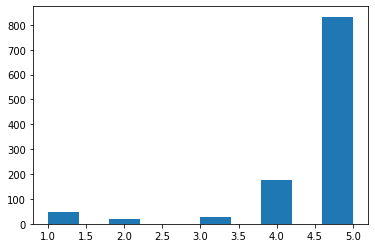

In [ ]:
plt.hist(train_data.rating)

In [ ]:
svd_new=TruncatedSVD(n_components=150)

In [ ]:
word_vec=svd_new.fit_transform(tfidf_mat_train.T)

In [ ]:
word_vec.shape

(264, 150)

In [ ]:
word_vec

array([[ 0.09936148, -0.03256126, -0.00245926, ...,  0.03507838,
        -0.00716084, -0.06536911],
       [ 0.13672652,  0.00129603, -0.04470515, ..., -0.04471791,
        -0.09553459,  0.04982507],
       [ 0.18351121,  0.08134952,  0.02904484, ...,  0.00617998,
         0.01818172, -0.05803576],
       ...,
       [ 0.14397837, -0.02450696, -0.01307075, ...,  0.02703457,
         0.0159599 ,  0.11961155],
       [ 0.1709233 , -0.01095851, -0.02589905, ...,  0.04239776,
         0.08778365, -0.05460123],
       [ 0.07203593,  0.00676155, -0.03588504, ..., -0.04430665,
        -0.00524774,  0.00895206]])

In [ ]:
tfidf.vocabulary_

{'super': 212,
 'good': 94,
 'size': 206,
 'screen': 198,
 'much': 143,
 'better': 18,
 'camera': 33,
 'still': 211,
 'worth': 256,
 'go': 93,
 'terrific': 219,
 'awesome': 9,
 'loved': 129,
 'big': 19,
 'display': 59,
 'battery': 13,
 'backup': 11,
 'great': 96,
 'colour': 39,
 'apple': 5,
 'u': 230,
 'want': 243,
 'best': 17,
 'market': 134,
 'really': 187,
 'cool': 45,
 'looking': 125,
 'life': 120,
 'performance': 166,
 'look': 124,
 'fabulous': 74,
 'way': 245,
 'iphones': 110,
 'fine': 82,
 'writing': 258,
 'review': 193,
 'using': 238,
 'almost': 1,
 'months': 142,
 'value': 239,
 'money': 140,
 'pretty': 174,
 'nice': 149,
 'superb': 213,
 'ios': 109,
 'update': 231,
 'recommend': 189,
 'buy': 30,
 'instead': 108,
 'se': 199,
 'received': 188,
 'issues': 112,
 'delivery': 53,
 'now': 152,
 'coming': 41,
 'decent': 49,
 'price': 175,
 'portrait': 172,
 'photos': 168,
 'excellent': 70,
 'easily': 64,
 'last': 117,
 'day': 46,
 'product': 178,
 'features': 78,
 'quality': 184,
 'm

In [ ]:
tfidf.vocabulary_['super']

212

In [ ]:
# Lets find out words which are similar to super

In [ ]:
dist_super=pairwise_distances(X=word_vec,Y=word_vec[214,:].reshape(1,-1),metric='cosine')

In [ ]:
dist_super.flatten().argsort()

array([214, 201,  62, 203, 123, 107, 180,  75,  92,  22, 102, 145,  44,
        85,  80, 231, 235,  84, 135, 141, 183,  76, 217, 227, 193, 101,
        55, 156, 261, 138, 260,  90, 198, 147, 210,  69,  96, 172,  91,
       259,   5, 127, 256,  68, 119,  81,  29,  59,  17,  86, 150, 262,
        73, 165, 208,  95,  79, 109, 253, 179,  71,   8, 182, 163,  41,
        32,  10,  33, 178, 206,  54, 219,  94, 110,  66, 240, 129,  74,
       151,  77, 191, 166,  43,  19, 220, 100, 228, 116,  88, 205,  35,
        67, 213, 111,  16, 187,  58, 249, 175, 146,  24,  56, 211,  52,
       118, 140, 255, 237, 224, 106,  13, 153,  21,  78, 200, 216, 222,
       185,  70, 137, 125, 229, 244, 202, 171, 122,  98, 170, 195, 155,
       215,   4, 121,  61, 248, 174,  26, 242, 186, 161, 152,  20, 117,
        57, 139, 112, 120,  63,   3, 157, 243, 128,  60, 239, 234, 199,
       143, 190, 258, 105, 115, 126, 218,  36,   1, 108, 173, 132, 192,
        40,  49,  28, 212,   0,  14, 131, 104, 103,  11,  30, 25

In [ ]:
id_to_word={v:k for k,v in tfidf.vocabulary_.items()}

In [ ]:
id_to_word[78]

'features'

In [ ]:
id_to_word[82]

'fine'

In [ ]:
id_to_word[107]

'id'

In [ ]:
id_to_word[133]

'many'

In [ ]:
# The most similar words associated with super are features fine id made

# Word Cloud

In [ ]:
train_data.rating.value_counts().index

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [ ]:
train_data['rating']=train_data.rating.map(convert_to_number)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  1100 non-null   float64
 1   review  1100 non-null   object 
dtypes: float64(1), object(1)
memory usage: 25.8+ KB


In [ ]:
train_data.shape

(1100, 2)

In [ ]:
train_data.rating.isnull().sum()

0

In [ ]:
only_reviews=" ".join(train_data.review)

In [ ]:
wc=WordCloud(width=1200,height=800,max_words=200,stopwords=stop,background_color='white')


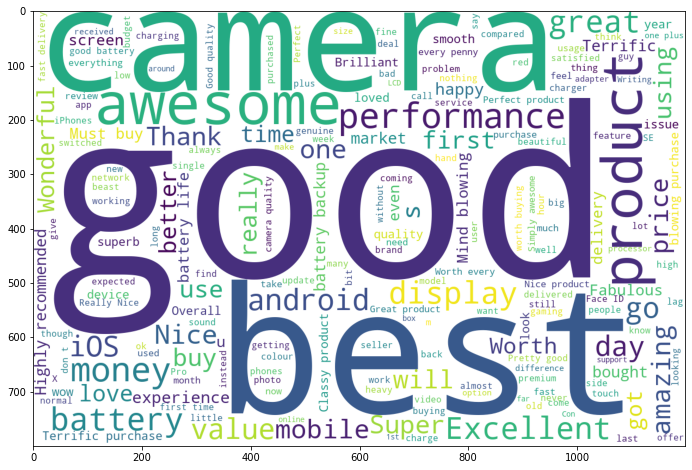

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

# Count Vectorizer

In [ ]:
wordcounts(flipkart_1,1)

{'good': 461, 'product': 369, 'battery': 286, 'camera': 266, 'awesome': 259, 'best': 249, 'performance': 171, 'great': 168, 'money': 161, 'nice': 159, 'flipkart': 157, 'apple': 156, 'display': 139, 'purchase': 138, 'android': 133, 'buy': 128, 'excellent': 128, 'worth': 121, 'quality': 117, 'go': 115, 'terrific': 112, 'ios': 109, 's': 108, 'value': 107, 'one': 107, 'price': 106, 'really': 101, 'first': 98, 'better': 96, 'amazing': 90, 'super': 88, 'mobile': 86, 'will': 84, 'using': 82, 'time': 80, 'wonderful': 77, 'use': 77, 't': 76, 'delivery': 71, 'experience': 70, 'perfect': 70, 'day': 69, 'love': 69, 'got': 67, 'backup': 66, 'must': 66, 'happy': 65, 'bought': 62, 'market': 61, 'fast': 61, 'highly': 61, 'screen': 59, 'recommended': 59, 'life': 58, 'every': 58, 'mind': 56, 'days': 54, 'even': 54, 'blowing': 53, 'fabulous': 52, 'thanks': 52, 'u': 51, 'simply': 51, 'smooth': 49, 'brilliant': 49, 'much': 48, 'loved': 48, 'classy': 48, 'wow': 47, 'overall': 47, 'now': 46, 'superb': 45, 'd

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'flipkart'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
wordcounts(flipkart_1,2)

{'value money': 98, 'battery backup': 62, 'highly recommended': 56, 'battery life': 54, 'mind blowing': 53, 'best market': 51, 'must buy': 50, 'terrific purchase': 50, 'blowing purchase': 47, 'classy product': 46, 'perfect product': 44, 'simply awesome': 43, 'nice product': 41, 'worth every': 41, 'every penny': 41, 'great product': 40, 'worth money': 35, 'good battery': 33, 'camera quality': 33, 'thanks flipkart': 32, 'don t': 30, 'camera good': 29, 'really nice': 25, 'pretty good': 25, 'good product': 25, 'product good': 24, 'performance good': 21, 'good camera': 21, 'android ios': 20, 'thank flipkart': 20, 'good quality': 19, 'face id': 17, 'first time': 17, 'camera battery': 16, 'one best': 16, 'fast delivery': 15, 'worth buying': 15, 'writing review': 14, 'battery performance': 14, 'excellent battery': 14, 'quality good': 14, 'one plus': 14, 'quality product': 14, 'display good': 13, 'really good': 12, 'awesome awesome': 12, 'fast charger': 12, 'amazing camera': 12, 'android phones

# Synctactic analysis

In [ ]:
only_reviews

'Super! It\'s so good with a medium size screen and much better camera. It\'s still worth in 2021. Go for it. Terrific Awesome smart phone.... Loved it.Big display, awesome battery backup, Monster sounds, great colour, Apple durability what more u want. Best in the market! It is really cool . This iPhone XR is really good and cheap also . Are you looking for a good phone ,good battery life , good performance, good camera, videography then look or go through it .❤️❤️ Fabulous! This phone is Epic💕💕💕Just loved it!! Camera is the best part while battery backup is way better than other iphones ! Display is fine dont worry🤦🏻\u200d♀️✨ Super! Writing this review after using iPhone XR for almost six months, a total value for money phone. Battery performance is pretty nice in comparison to other iPhones.Camera is superb. Looking forward for iOS 14 update. I would recommend to buy XR instead of SE2 . Really Nice I received my phone packaged properly and there were no issues with delivery. Now com

In [ ]:
texts=nlp(only_reviews)

In [ ]:
for token in texts[:20]:
    print(token.text)

Super
!
It
's
so
good
with
a
medium
size
screen
and
much
better
camera
.
It
's
still
worth


In [ ]:
for token in texts[:20]:
    print(token.text,token.pos_)

Super PROPN
! PUNCT
It PRON
's AUX
so ADV
good ADJ
with ADP
a DET
medium ADJ
size NOUN
screen NOUN
and CCONJ
much ADV
better ADJ
camera NOUN
. PUNCT
It PRON
's AUX
still ADV
worth ADJ


In [ ]:
list(texts.noun_chunks)

[Super,
 It,
 a medium size screen,
 much better camera,
 It,
 it,
 Terrific Awesome smart phone,
 it,
 Big display,
 awesome battery backup,
 Monster sounds,
 great colour,
 Apple durability,
 what,
 u,
 the market,
 It,
 This iPhone XR,
 you,
 a good phone,
 good battery life,
 good performance,
 good camera,
 videography,
 it,
 ️,
 This phone,
 it,
 Camera,
 the best part,
 battery backup,
 other iphones,
 Display,
 ️,
 ✨ Super,
 this review,
 iPhone XR,
 almost six months,
 a total value,
 money phone,
 Battery performance,
 comparison,
 other iPhones,
 Camera,
 iOS 14 update,
 I,
 XR,
 SE2,
 I,
 my phone,
 no issues,
 delivery,
 the phone,
 I,
 it,
 4 stars,
 Camera - Decent camera,
 much better camera,
 the price,
 This camera,
 2018 phone,
 2021 phone,
 you,
 macro shots,
 flowers,
 it,
 Landscape and portrait photos,
 Battery - Great battery backup,
 an avera,
 Super,
 Very nice product,
 great features,
 superior quality,
 ... mind-blowing purchase,
 thanks,
 Really amazing ph

In [ ]:
for chunk in texts.noun_chunks:
  if len(chunk)>5:
    print(chunk)

Camera and image processing (portrait modes)2
a perfect compact phone    Great performance a12bionic chip camera quality
super fast and smooth experiencereally great phone
the 128GB Product RED version
a different hands-on experience
an "Budget" apple iphone
100% genuine and timely delivery
The best cameraThe best batteryThe best performance
the most genuine online shopping site
Long lasting battery + Flawless portrait mode
“Amoled” or “Oled” display
Mind-blowing purchase Best phone
a fine battery backupIt’s display
Xs or Xs max3GB RAM
most other bran new smart phones
Samsung’s latest phone Samsung Galaxy Z
Always reliable and safe but little bit problem
💗💗💗💗💗 perfact iphone
some 7 to 8 hours backup
Mostly the phone Like premium look
iPhone Simply awesome Excellent very nice phone
Some key points1 - Moving photos
it's ecosystem.2 - Battery life
appleBest camera quality Best screen resolution
neither small nor big..its perfect size
Its such a smooth os experience n performance
One the b

In [ ]:
list(texts.sents)

[Super!,
 It's so good with a medium size screen and much better camera.,
 It's still worth in 2021.,
 Go for it.,
 Terrific Awesome smart phone.... Loved it.,
 Big display, awesome battery backup, Monster sounds, great colour, Apple durability what more u want.,
 Best in the market!,
 It is really cool .,
 This iPhone XR is really good and cheap also .,
 Are you looking for a good phone ,good battery life , good performance, good camera, videography then look or go through it .,
 ❤️❤️ Fabulous!,
 This phone is Epic💕💕💕Just loved it!!,
 Camera is the best part while battery backup is way better than other iphones !,
 Display is fine dont worry🤦🏻‍♀️✨ Super!,
 Writing this review after using iPhone XR for almost six months, a total value for money phone.,
 Battery performance is pretty nice in comparison to other iPhones.,
 Camera is superb.,
 Looking forward for iOS 14 update.,
 I would recommend to buy XR instead of SE2 .,
 Really Nice I received my phone packaged properly and there wer

In [ ]:
for ent in texts.ents:
  print(ent.text,ent.label_)

2021 DATE
Apple ORG
XR PRODUCT
Epic ORG
XR PRODUCT
almost six months DATE
14 CARDINAL
XR PRODUCT
2018 DATE
2021 DATE
XR PRODUCT
memoji animoji PERSON
Flipkart ORG
1st ORDINAL
7hrs CARDINAL
2 days DATE
ooooo PERSON
2nd ORDINAL
XR PRODUCT
2020 DATE
11 CARDINAL
Apple ORG
a12bionic ORG
the end of the day DATE
first ORDINAL
first ORDINAL
OnePlues ORG
Terrific Great EVENT
1 CARDINAL
2021 DATE
128 CARDINAL
an "Budget EVENT
100% PERCENT
Flipkart ORG
first ORDINAL
Chinese NORP
California GPE
India GPE
Apple ORG
Flipkart ORG
6S CARDINAL
10% to 90% PERCENT
90 mins TIME
samsung ORG
8 CARDINAL
90% PERCENT
3 CARDINAL
only 5gb CARDINAL
4 CARDINAL
one month DATE
Flipkart ORG
last 4 months DATE
flipkart ORG
Corel ORG
first ORDINAL
one CARDINAL
dayDisplay ORG
PUBG ORG
3rd ORDINAL
XR PRODUCT
11/12 CARDINAL
One CARDINAL
XR PRODUCT
A12 ORG
Bionic PRODUCT
2 and half hours TIME
XR PRODUCT
XR PRODUCT
Youtube ORG
XR PRODUCT
first ORDINAL
XR PRODUCT
Face Recognition WORK_OF_ART
Second ORDINAL
the Control Center

In [ ]:
for token in texts:
  if token.ent_type_ =='PERSON':
    txt=" ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text,token.dep_," ".join([i.text for i in token.subtree]))

animoji pobj memoji animoji
Flipkart compound Flipkart 💕
Max conj XS Max
Max appos XS Max ) and Not very small(iPhone X or iPhone XS )
XS conj iPhone XS
Fabulous acomp 💯 Fabulous
Dad nsubj My Dad
Tusking compound Muti Tusking
bcaz attr bcaz i wo nt use ofter ,
Cooks nsubj Tim Rob Jobs Cooks or any Apple employee  
Max conj XS Max
Gb compound 128 Gb
Jobs nsubj Steve Jobs
Worth ROOT Awesome ❤ ️ ❣ ️ Worth every penny
Se ROOT Awsome Flipkart Ko Dil Se
max pobj xs max
don ccomp I don knw
bcuz acomp just bcuz i like the cAmera , battery liff
gud nsubj so gud
Pubg pobj Pubg and COD.Don’t
PHONE nsubj PERFECT PHONE
Idk npadvmod Good Idk
yaar attr awesome yaar
Fabulous appos Fasak Fabulous
Phone nsubj Highly recommended Excellent phone Wonderful Phone
canera nsubj battery ans canera
Satisfying ccomp that a good sign Wonderful Satisfying
Okk compound purchase Okk
Worth appos ️ ☺ ️ Worth every penny
Performance nsubj Wonderful Performance
Max conj 11 Pro Max or iPhone 12 series


In [ ]:
sent1=list(texts.sents)[1]
sent1

It's so good with a medium size screen and much better camera.

In [ ]:
sent2=list(texts.sents)[2]
sent2

It's still worth in 2021.

In [ ]:
displacy.render(sent1,jupyter=True)

In [ ]:
doc1=nlp(only_reviews)

In [ ]:
displacy.render(doc1,style="ent",jupyter=True)

In [ ]:
for token in doc1:
  print(token)
  print(token.pos_)

Streaming output truncated to the last 5000 lines.
review
NOUN
after
ADP
2weeks
NOUN
of
ADP
usage
NOUN
..
PUNCT
Gr8
ADJ
performance
NOUN
..
PUNCT
solves
VERB
the
DET
dual
ADJ
sim
NOUN
option
NOUN
..
PUNCT
u
PRON
can
AUX
install
VERB
an
DET
esim
NOUN
with
ADP
this
PRON
..
PUNCT
only
ADV
thing
NOUN
this
PRON
lacks
VERB
is
AUX
that
SCONJ
it
PRON
takes
VERB
a
DET
lot
NOUN
of
ADP
time
NOUN
to
PART
charge
VERB
..
PUNCT
keeping
VERB
this
PRON
apart
ADV
once
SCONJ
u
PROPN
update
VERB
ios
NOUN
14.6
NUM
it
PRON
has
VERB
no
DET
comparison
NOUN
Terrific
ADJ
purchase
NOUN
One
NUM
of
ADP
the
DET
best
ADJ
iphones
NOUN
.
PUNCT
Large
ADJ
display
NOUN
.
PUNCT
Good
ADJ
camera
NOUN
and
CCONJ
excellent
ADJ
battery
NOUN
Perfect
PROPN
product
NOUN
!
PUNCT
good
ADJ
Terrific
PROPN
Good
PROPN
ang
PROPN
timely
ADV
delivered
VERB
and
CCONJ
filpkart
ADJ
cares
VERB
abt
INTJ
the
DET
value
NOUN
for
ADP
customer
NOUN
money
NOUN
they
PRON
give
VERB
a
DET
followup
NOUN
call
NOUN
to
PART
get
VERB
confirm
NOUN
of
ADP
prod

In [ ]:
for token in doc1:
  if token.pos_ =='NOUN':
    print(token)

Streaming output truncated to the last 5000 lines.
link
feedback
gratitude
service
experience
p
class
Battery
backup
week
review
end
Camera
Performance
efficiency
star
money
comment
phone
performance
value
money
thing
phone
product
issues
time
kind
call
customer
service
customer
base
product
review
iphone
XRPros1
Security
apps
Screen
LCD
Amoled.5
Midway
price
w
updates
years.7
Charger
earphones
Cons.1
Battery
drain.2
Face
i
d
time
gam
product
purchase
iphone
iphone
performance
phone
issue
network
problems
battery
backup
purchase
days
usage
camera
camera
U
HD
display
media
display
battery
life
beast
pixel
phone
family
purchase
piece
dimensions
aspects
Camera
mind
perfomance
butter
pan
user
experience
device
expectation
level
phone
product
world
company
apple
Worth
money
time
Iphone
user
phone
price
earpod
adapter
battery
backup
lagging
Product
year
Manufacturing
date
Pros
value
money
camera
love
issue
processor
software
Display
size
Battery
output
superbCons
Display
iphones
side
side
di

In [ ]:
for token in doc1:
  if token.orth_ == 'camera':
    print(token.dep_)
    print([w.dep_ for w in token.head.rights])
    print([w for w in token.head.rights])

conj
['cc', 'conj']
[and, camera]
conj
['punct', 'conj']
[,, camera]
ROOT
[]
[]
attr
['attr', 'punct']
[camera, .]
nsubj
['acomp', 'prep', 'cc', 'conj', 'punct']
[good, for, but, outdated, .]
compound
[]
[]
nmod
['prep']
[for]
pobj
['pobj']
[camera]
compound
[]
[]
nsubj
['dep', 'conj', 'dobj', 'punct', 'acomp']
[bright, good, sound, ..., bulky]
npadvmod
[]
[]
nsubj
['acomp']
[good]
appos
['punct', 'appos']
[,, camera]
nsubj
['acomp']
[awsome]
ROOT
['punct']
[.]
pobj
['pobj']
[camera]
attr
['attr', 'punct']
[camera, preformance]
pobj
['pobj']
[camera]
nmod
[]
[]
npadvmod
[]
[]
conj
['punct', 'conj']
[,, camera]
nsubj
['acomp']
[outdated]
nsubj
['acomp']
[awesome]
conj
['cc', 'conj']
[and, camera]
compound
[]
[]
nsubj
['prep', 'acomp', 'ccomp', 'punct']
[up, good, get, .]
pobj
['pobj', 'pobj', 'punct']
[camera, display, !]
pobj
['pobj']
[camera]
nsubj
['neg', 'attr', 'punct']
[not, factor, .]
pobj
['pobj', 'cc', 'conj']
[camera, and, with]
conj
['prep', 'punct', 'conj', 'punct']
[for, ,,

In [ ]:
for token in doc1:
  if token.dep_ in ['nsubj']:
    print("{}--{}".format(token.orth_,[w for w in token.head.rights]))

It--[good, .]
It--[still, worth, in, .]
phone--[it, .]
u--[]
It--[cool, .]
XR--[good, also, .]
you--[for]
videography--[or, go, .]
phone--[loved, !, !]
Camera--[part, is, !]
backup--[better]
Display--[fine, worry, !]
performance--[nice, in, .]
Camera--[superb, .]
I--[buy, .]
I--[phone, packaged, and, were]
I--[rate, .]
camera--[good, for, but, outdated, .]
you--[click]
it--[better, look, .]
photos--[excellent, .]
thanks--[superb, .]
phone--[with, 13.1.3]
it--[have, .]
I--[it, 😍, Thanks, .Thanks]
😍--[]
i--[itt, ....]
I--[android, to, things.specially]
i--[😍, display, ...]
’s--[it, simple]
Phone--[smooth, and, notice]
you--[from]
you--[difference, matter, .]
you--[earlier]
you--[from]
you--[days, get, .., like, but, 's]
you--[into]
Animations--[]
you--[them)4, .]
ID--[su, ...]
colour--[fresh+beautiful+awesome, .]
it--[so, colour, .]
features--[for]
i--[.]
i--[Sorry, is]
i--[it, 🖖, .]
It--[is]
quality--[good, in, .]
Display--[issues, .]
it--[IPhone, .]
you--[for, .]
privacy--[superb, Than

In [ ]:
for token in doc1:
  if token.dep_ in ['nsubj']:
    words=[w for w in token.head.rights]
    for wo in words:
      if wo.dep_=="acomp":
        print("{}--{}".format(token.orth_,[w for w in wo.subtree]))

It--[so, good, with, a, medium, size, screen, and, much, better, camera]
It--[worth]
It--[really, cool]
XR--[really, good, and, cheap]
phone--[Epic, 💕, 💕, 💕, Just, loved, it]
backup--[way, better, than, other, iphones]
Display--[fine]
performance--[pretty, nice]
Camera--[superb]
camera--[good]
it--[better]
photos--[excellent]
thanks--[superb]
Phone--[damn, smooth]
colour--[fresh+beautiful+awesome]
i--[Sorry, for, my, photography, but]
quality--[very, good, at, daylight, but, poor, quality]
privacy--[extremely, superb,     ]
i--[very, glad, that, i, bought, this, instead, of]
Display--[great]
quality--[great]
quality--[good, and]
performance--[so, smooth, and, fast]
it--[worth, the, money, I, have, spent, on, this, mobile]
packaging--[absolutely, fine]
it--[a, bit, too, wide]
Charging--[pretty, fast]
camera--[a, bit, bulky]
Flipkart--[best]
cameras--[super, super, Great, plus]
quality--[really, sharp]
everything--[premium]
Camera--[awesome]
display--[LED]
it--[great]
quality--[great]
wh

In [ ]:
for en in doc1.ents:
  print(en.orth_,en.label_)

2021 DATE
Apple ORG
XR PRODUCT
Epic ORG
XR PRODUCT
almost six months DATE
14 CARDINAL
XR PRODUCT
2018 DATE
2021 DATE
XR PRODUCT
memoji animoji PERSON
Flipkart ORG
1st ORDINAL
7hrs CARDINAL
2 days DATE
ooooo PERSON
2nd ORDINAL
XR PRODUCT
2020 DATE
11 CARDINAL
Apple ORG
a12bionic ORG
the end of the day DATE
first ORDINAL
first ORDINAL
OnePlues ORG
Terrific Great EVENT
1 CARDINAL
2021 DATE
128 CARDINAL
an "Budget EVENT
100% PERCENT
Flipkart ORG
first ORDINAL
Chinese NORP
California GPE
India GPE
Apple ORG
Flipkart ORG
6S CARDINAL
10% to 90% PERCENT
90 mins TIME
samsung ORG
8 CARDINAL
90% PERCENT
3 CARDINAL
only 5gb CARDINAL
4 CARDINAL
one month DATE
Flipkart ORG
last 4 months DATE
flipkart ORG
Corel ORG
first ORDINAL
one CARDINAL
dayDisplay ORG
PUBG ORG
3rd ORDINAL
XR PRODUCT
11/12 CARDINAL
One CARDINAL
XR PRODUCT
A12 ORG
Bionic PRODUCT
2 and half hours TIME
XR PRODUCT
XR PRODUCT
Youtube ORG
XR PRODUCT
first ORDINAL
XR PRODUCT
Face Recognition WORK_OF_ART
Second ORDINAL
the Control Center

In [ ]:
for chunk in doc1.noun_chunks:
  print(chunk)

Streaming output truncated to the last 5000 lines.
What
My living room
the LG 4K 55" TV
I
I
the money
this one
you
Tim Rob Jobs Cooks
any Apple employee
the next Tesla
your money
course
the first time
iOS
it
a different experience
it
some time
use
it
it
tough buy
it
it
Products hardware
software
no lags
Touch
Some features
Android
which
I
last 10 years
it
a good experience
I
few more days
it
u
iPhone
I
11 or upper versions
I
it
the best phone
the market
The best thing
the iPhone
it
hardware
The outer finish
it
Worth
it
iPhone
you
iPhone xr
every thing
you
the product
ekart
the
my old phone
some non sense reasons
they
a swipe machine
their office
the delivery boy
it
8-9 pm
you
office
your parcel
overall phone
ekart services Wonderful Honest review
extensive use
1 month.1
Battery backup
internet
whole day
maximal use
battery percentage
end
the day
around 30-40%
This
the best battery
I
any apple product.2
Ease
access
Especially the face
id
your locking
unlocking
payment experience
Sound q

In [ ]:
def ent_relation(txt):
  output=[]
  doc=nlp(txt)
  for token in doc:
    if token.dep_ == 'nsubj':
      words = [w for w in token.head.rights]
      for wo in words:
        if wo.dep_ in ['acomp','amod']:
          output.append((token.orth_,' '.join([w.text for w in wo.subtree])))
      
  return(output)

In [ ]:
ent_relation(doc1)

[('It', 'so good with a medium size screen and much better camera'),
 ('It', 'worth'),
 ('It', 'really cool'),
 ('XR', 'really good and cheap'),
 ('phone', 'Epic 💕 💕 💕 Just loved it'),
 ('backup', 'way better than other iphones'),
 ('Display', 'fine'),
 ('performance', 'pretty nice'),
 ('Camera', 'superb'),
 ('camera', 'good'),
 ('it', 'better'),
 ('photos', 'excellent'),
 ('thanks', 'superb'),
 ('Phone', 'damn smooth'),
 ('colour', 'fresh+beautiful+awesome'),
 ('i', 'Sorry for my photography but'),
 ('quality', 'very good at daylight but poor quality'),
 ('privacy', 'extremely superb     '),
 ('i', 'very glad that i bought this instead of'),
 ('Display', 'great'),
 ('quality', 'great'),
 ('quality', 'good and'),
 ('performance', 'so smooth and fast'),
 ('it', 'worth the money I have spent on this mobile'),
 ('packaging', 'absolutely fine'),
 ('it', 'a bit too wide'),
 ('Charging', 'pretty fast'),
 ('camera', 'a bit bulky'),
 ('Flipkart', 'best'),
 ('cameras', 'super super Great plus')

# Topic Modelling

In [ ]:
only_reviews1=train_data.review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews1]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['super',
  'it',
  's',
  'good',
  'medium',
  'size',
  'screen',
  'better',
  'camera',
  'it',
  's',
  'worth',
  'it'],
 ['terrific',
  'awesome',
  'smart',
  'phone',
  'loved',
  'it',
  'big',
  'display',
  'awesome',
  'battery',
  'backup',
  'monster',
  'sounds',
  'great',
  'colour',
  'apple',
  'durability',
  'u',
  'want'],
 ['best',
  'market',
  'cool',
  'iphone',
  'xr',
  'good',
  'cheap',
  'looking',
  'good',
  'phone',
  'good',
  'battery',
  'life',
  'good',
  'performance',
  'good',
  'camera',
  'videography',
  'look'],
 ['fabulous',
  'phone',
  'epic',
  'just',
  'loved',
  'it',
  'camera',
  'best',
  'battery',
  'backup',
  'way',
  'better',
  'iphones',
  'display',
  'fine',
  'dont',
  'worry'],
 ['super',
  'writing',
  'review',
  'iphone',
  'xr',
  'months',
  'total',
  'value',
  'money',
  'phone',
  'battery',
  'performance',
  'pretty',
  'nice',
  'comparison',
  'iphones',
  'camera',
  'superb',
  'looking',
  'forward',


In [ ]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [ ]:
dictionaries.filter_extremes(no_below=10)

In [ ]:
len(list(dictionaries))

250

In [ ]:
flipkart_corpora = [dictionaries.doc2bow(t) for t in tokens]

In [ ]:
tfidf_flipkart = gensim.models.TfidfModel(flipkart_corpora)
tfidf_corpus = tfidf_amazon[flipkart_corpora]

In [ ]:
len(tfidf_corpus)

1100

In [ ]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionaries)

In [ ]:
lsi_model.print_topics(num_topics=5)

[(0,
  '0.561*"phone" + 0.369*"product" + 0.365*"good" + 0.239*"camera" + 0.232*"best" + 0.160*"iphone" + 0.135*"xr" + 0.129*"performance" + 0.119*"purchase" + 0.115*"flipkart"'),
 (1,
  '-0.699*"product" + 0.618*"phone" + -0.256*"good" + 0.145*"best" + -0.108*"perfect" + -0.089*"classy" + -0.056*"money" + 0.051*"wonderful" + -0.050*"quality" + -0.048*"purchase"'),
 (2,
  '-0.498*"product" + 0.492*"good" + -0.431*"phone" + 0.327*"camera" + 0.208*"best" + 0.163*"performance" + 0.149*"iphone" + 0.118*"xr" + 0.118*"money" + 0.102*"battery"'),
 (3,
  '0.695*"best" + -0.520*"good" + -0.229*"phone" + 0.210*"purchase" + 0.184*"market" + 0.130*"terrific" + 0.120*"money" + 0.114*"value" + 0.111*"iphone" + 0.093*"product"'),
 (4,
  '-0.526*"best" + 0.477*"purchase" + 0.283*"terrific" + 0.280*"money" + -0.247*"good" + 0.234*"value" + -0.166*"market" + 0.164*"mind" + 0.148*"flipkart" + 0.148*"xr"')]

In [ ]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [ ]:
lsi_model.projection.s

array([12.08509574,  8.26709015,  6.9131477 ,  6.52098578,  6.0143502 ])

In [ ]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus],num_docs=1100, 
                                         num_terms=len(lsi_model.projection.s))

In [ ]:
(tfidf_mat.T/lsi_model.projection.s).shape

(1100, 5)

In [ ]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [ ]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [ ]:
silhouette_score(V_mat, labels=km[1])

0.32106913901664275

In [ ]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.30747522784159853
0.29680121288437084
0.31805711557415006
0.3387402311475506
0.3205085621361898
0.3253489476384678
0.31975896309861956
0.324869389987103
0.32036087293577736
0.32409963700763494
0.315258067317089
0.3258734279311742
0.3376786824799009
0.3421376913364998
0.32629477144704444
0.3303439689919776
0.33688649584216207
0.33623930290320453
0.33799211884804664
0.333113035786005
0.3318488848599115
0.3378008691875911
0.3323099912132752
0.330248244423869
0.3300299713483708
0.33508768454912075
0.325086774804908
0.332881635313314


In [ ]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [ ]:
lda_model = gensim.models.ldamulticore.LdaMulticore(amazon_corpora,num_topics=20, iterations= 100,id2word= dictionaries)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_model.print_topics(num_topics= 5)

[(14,
  '0.117*"it" + 0.095*"loved" + 0.067*"better" + 0.031*"way" + 0.031*"didn" + 0.031*"different" + 0.031*"awesome" + 0.020*"writing" + 0.020*"days" + 0.020*"performance"'),
 (4,
  '0.047*"battery" + 0.046*"buying" + 0.034*"awesome" + 0.031*"loved" + 0.027*"buy" + 0.025*"super" + 0.025*"iphone" + 0.023*"day" + 0.022*"better" + 0.021*"cool"'),
 (11,
  '0.055*"buying" + 0.053*"super" + 0.041*"single" + 0.032*"need" + 0.030*"buy" + 0.028*"nice" + 0.027*"loved" + 0.027*"awesome" + 0.027*"day" + 0.026*"pubg"'),
 (8,
  '0.052*"days" + 0.041*"backup" + 0.037*"battery" + 0.036*"life" + 0.034*"nice" + 0.033*"quick" + 0.031*"it" + 0.029*"excellent" + 0.028*"day" + 0.027*"buying"'),
 (18,
  '0.078*"buying" + 0.044*"need" + 0.039*"days" + 0.035*"pubg" + 0.031*"buy" + 0.026*"bit" + 0.026*"awesome" + 0.026*"pretty" + 0.026*"wonderful" + 0.026*"superb"')]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, flipkart_corpora, dictionary=lda_model.id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.021902 -0.003715       1        1  22.736168
10     0.044662  0.008649       2        1   7.744301
16     0.022833 -0.055475       3        1   7.404766
15     0.036184 -0.022276       4        1   7.322090
4     -0.032711 -0.028976       5        1   6.964543
9      0.012985 -0.061308       6        1   6.943466
6      0.054707  0.031094       7        1   5.203006
13    -0.006263  0.004762       8        1   4.018476
3      0.010827 -0.000561       9        1   3.881327
8     -0.020236 -0.061658      10        1   3.722197
7      0.073727  0.016717      11        1   3.519826
5      0.041951 -0.088830      12        1   3.512219
1      0.002005 -0.016011      13        1   2.985375
17    -0.108607  0.146840      14        1   2.934491
14     0.082220  0.128723      15        1   2.355533
12     0.052860  0.065919      16        1   2.307363
19     0.006471  0.051214      17        1   2.074352
18    -0.200046  0.029089      18        1   1.953337
11    -0.099315 -0.088708      19        1   1.222886
2      0.003844 -0.055489      20        1   1.194278, topic_info=          Term        Freq       Total Category  logprob  loglift
3           it  475.000000  475.000000  Default  30.0000  30.0000
17       loved  521.000000  521.000000  Default  29.0000  29.0000
77        days  314.000000  314.000000  Default  28.0000  28.0000
127     buying  201.000000  201.000000  Default  27.0000  27.0000
12     battery  520.000000  520.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
56        like    1.197627   69.284184  Topic20  -4.7625   0.3698
24      iphone    1.655238  202.625195  Topic20  -4.4389  -0.3798
54   excellent    1.307240   98.964180  Topic20  -4.6750   0.1008
0       better    1.655238  274.203674  Topic20  -4.4389  -0.6823
31    fabulous    1.285197  109.023593  Topic20  -4.6920  -0.0130

[995 rows x 6 columns], token_table=      Topic      Freq Term
term                      
98        1  0.243293    a
98        2  0.034756    a
98        4  0.034756    a
98        6  0.208537    a
98        7  0.208537    a
...     ...       ...  ...
147       5  0.113379  you
147       9  0.056690  you
147      10  0.113379  you
147      12  0.056690  you
147      13  0.056690  you

[2041 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 11, 17, 16, 5, 10, 7, 14, 4, 9, 8, 6, 2, 18, 15, 13, 20, 19, 12, 3])